In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [35]:
df = pd.read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Amdari\ElectroTech-Sales-Forecast\EDA\cleaned_data.csv')

In [36]:
print(df.head())

   Product_ID    Category   Price        Date  Season  Market_Trend_Index  \
0        1103      Laptop  105.32  2009-01-01  Winter           -1.859160   
1        1436      Tablet  145.55  2009-01-01  Winter           -0.345587   
2        1271  Smartphone   97.82  2009-01-01  Winter           -0.384738   
3        1107      Laptop   64.00  2009-01-01  Winter            0.716763   
4        1072      Tablet   67.83  2009-01-01  Winter           -0.242074   

   Competitor_Activity_Score  Consumer_Confidence_Index  \
0                   0.546694                  84.680465   
1                   0.940428                  42.919288   
2                   0.751155                  55.191268   
3                   0.125939                  88.746454   
4                  -0.412932                  67.947536   

  Product_Specification_1 Product_Specification_2  Sales_Volume  
0                  Spec_C       Long-Battery-Life            49  
1                  Spec_C             Lightweight 

In [37]:
#Quick statistics overview
df.describe(exclude=['object']).iloc[0:,1:]

,Price,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Sales_Volume
count,136193.000000,136193.000000,136193.000000,136193.000000,136193.000000
mean,106.812513,-0.000277,-0.000656,70.013109,122.305140
std,36.419229,1.009105,1.001551,14.733722,54.320849
min,40.510000,-4.067055,-4.181590,40.044830,6.000000
25%,75.560000,-0.683015,-0.676466,57.521063,81.000000
50%,104.710000,0.001093,0.000555,70.022715,119.000000
75%,138.310000,0.680506,0.674953,82.569582,161.000000
max,181.800000,4.728391,4.661979,99.926291,306.000000


In [38]:
df['Date']= pd.to_datetime(df['Date'])

In [39]:
print(f"\Date Range: from {df['Date'].min()} to {df['Date'].max()}")

\Date Range: from 2009-01-01 00:00:00 to 2020-12-30 00:00:00


In [40]:
df['year']=df['Date'].dt.year

In [41]:
df['month']=df['Date'].dt.month_name()

In [42]:
df

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume,year,month
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49,2009,January
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69,2009,January
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50,2009,January
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28,2009,January
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81,2009,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162,2020,December
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161,2020,December
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182,2020,December
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287,2020,December


In [47]:
sales_volume_by_cat = df.groupby(['month','Category'])['Sales_Volume'].sum().reset_index()


In [44]:
df

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume,year,month
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49,2009,January
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69,2009,January
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50,2009,January
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28,2009,January
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81,2009,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162,2020,December
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161,2020,December
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182,2020,December
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287,2020,December


In [ ]:
sales_volume_by_cat = df.groupby(['month', 'Category'])['Sales_Volume'].sum().reset_index()

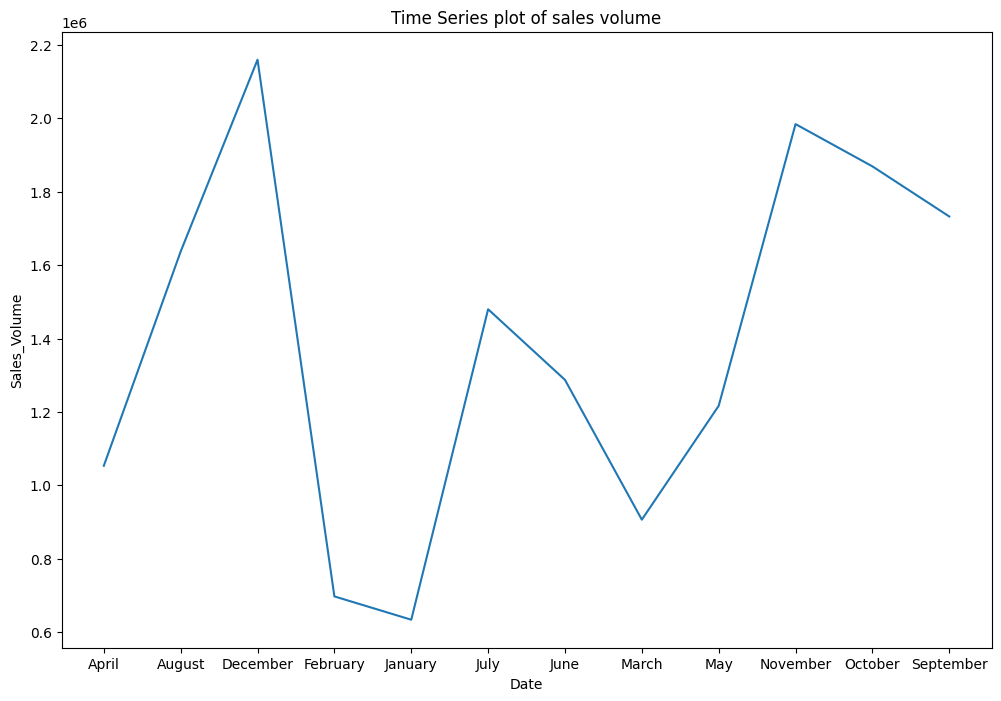

In [46]:
#plot sales volume by category and season
plt.figure(figsize=(12,8))
plt.plot(sales_volume_by_cat['month'], sales_volume_by_cat['Sales_Volume'])
plt.title('Time Series plot of sales volume')
plt.xlabel('Date')
plt.ylabel('Sales_Volume')
plt.show()

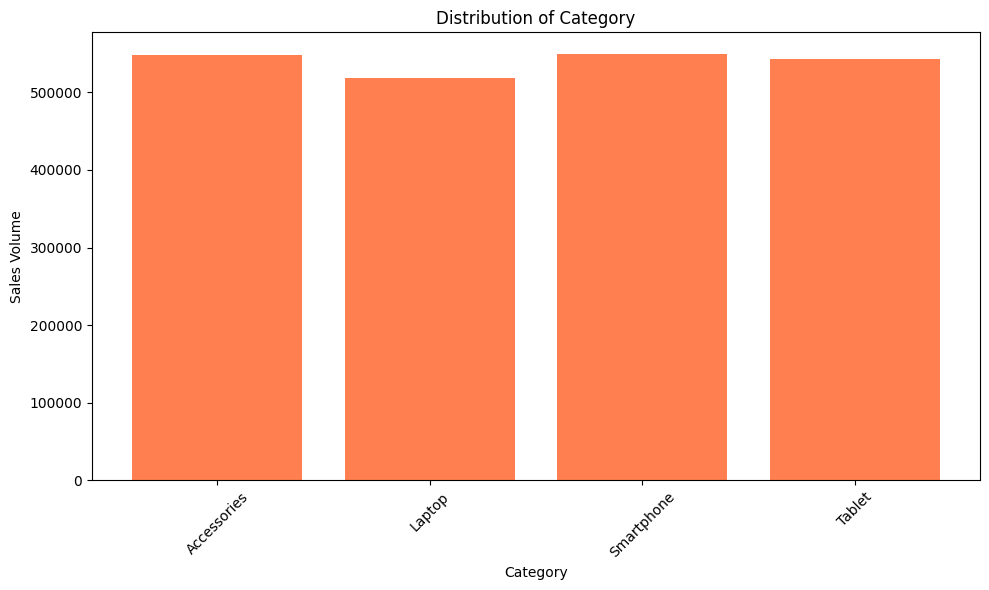

In [ ]:
#A plot of the category



plt.figure(figsize=(10,6))
plt.bar(sales_volume_by_cat['Category'], sales_volume_by_cat['Sales_Volume'], color='coral')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


